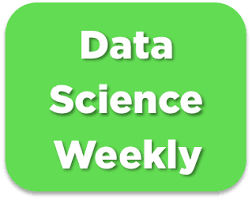

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *[README.md](README.md)*.**

# Import libraries

In [4]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    confusion_matrix
)

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "vscode" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

In [5]:
R_S=0 # random state
SAMPLE_RATE=0.1
MODEL="RANDOMFOREST"

# Read file with labels

In [6]:
data = pd.read_csv('data/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [7]:
data.head()
print()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


# Explore dataset

In [8]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000, random_state=R_S)
data_sample.isna().sum().sum()

#data_sample=data#
#data_sample.isna().sum().sum()

0

In [9]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ["country", "age", "new_user", "source", "total_pages_visited"]
for f in num_features:
    fig = px.histogram(
        data_sample, f, color="converted",  histnorm="probability"
    )
    fig.show()

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [10]:
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

categorical_selector = make_column_selector(dtype_include='object')

numeric_selector = make_column_selector(dtype_include='number')
print(categorical_selector)
display(numeric_selector)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(
    drop="first"
)  # no missing values in categorical data, so we only need the OHE

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_selector),
        ("cat", categorical_transformer, categorical_selector),
    ]
)
# transformers=make_column_transformer(
#     (StandardScaler(),numeric_selector ),
#     (OneHotEncoder(), categorical_selector))

In [11]:
X = data_sample.loc[:, features_list]
Y = data_sample.loc[:, target_variable]

print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [12]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=SAMPLE_RATE, random_state=R_S, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Training pipeline

In [13]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")
from sklearn.pipeline import make_pipeline
#pipeline=make_pipeline(transformers, LogisticRegression())
#featureencoder = StandardScaler()
X_train=preprocessor.fit_transform(X_train)
# RANDOM FOREST CV 3
# Perform grid search
print("Grid search...")
classifier = RandomForestClassifier()

# Grid of values to be tested
params = {
    "max_depth": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "min_samples_split": [2, 4, 8],
    "n_estimators": [10, 20, 40, 60, 80, 100],
}
gridsearch = GridSearchCV(
    classifier, param_grid=params, cv=3
)  # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)



#X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train)
#print('Explanatory train variables : ', X_train.columns)
#print('Explanatory test variables : ', X_test.columns)
print(X_test)
print()


Encoding categorical features and standardizing numerical features...
Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 10}
Best validation accuracy :  0.984111111111111
...Done
[[-1.27510007  0.68494372 -0.8535357  ...  1.          0.
   1.        ]
 [-0.66691845  0.68494372  0.3312906  ...  0.          1.
   0.        ]
 [-0.66691845  0.68494372 -1.14974228 ...  1.          1.
   0.        ]
 ...
 [-1.64000904  0.68494372  0.3312906  ...  1.          0.
   1.        ]
 [ 0.67108112  0.68494372  0.3312906  ...  1.          0.
   1.        ]
 [-0.66691845  0.68494372  0.92370375 ...  0.          0.
   0.        ]]
       country  age  new_user  source  total_pages_visited
204662   China   28         1     Seo                    2
281543      US   34         1     Seo                    3
26639       US   31         0     Seo                    3
267239      US   39         1     Seo                    7
2333

In [14]:
# BEST SELECT MODEL
#classifier = RandomForestClassifier()
#classifier=classifier.fit(X_train, Y_train)

In [15]:
# Train model
#print("Train model...")
#classifier = LogisticRegression() # 
#pipeline.fit(X_train, Y_train)
#
# print("...Done.")

In [16]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
#Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [17]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")
print('Explanatory test variables : ', X_test)
print()
X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding categorical features and standardizing numerical features...
Explanatory test variables :         country  age  new_user  source  total_pages_visited
204662   China   28         1     Seo                    2
281543      US   34         1     Seo                    3
26639       US   31         0     Seo                    3
267239      US   39         1     Seo                    7
233375      US   23         0     Seo                    2
...        ...  ...       ...     ...                  ...
126447   China   26         1  Direct                    1
243077      UK   32         1     Seo                    1
31137       UK   27         1     Seo                    3
121834      US   37         1     Seo                    8
210452      US   24         1     Seo                    6

[1000 rows x 5 columns]

...Done
[[-0.30200948  0.68494372 -0.8535357   0.          0.          0.
   0.          1.        ]
 [ 0.42780847  0.68494372 -0.55732913  0.          0.          1.

In [18]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

## Performance assessment

In [19]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

accuracy on training set :  0.9857777777777778
accuracy on test set :  0.986

f1-score on train set :  0.7638376383763837
f1-score on test set :  0.7741935483870968


In [20]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[8665   22]
 [ 106  207]]

Confusion matrix on test set : 
[[962   3]
 [ 11  24]]



In [21]:
column_names = []
for (
    name,
    step,
    features_list,
) in preprocessor.transformers_:  # loop over steps of ColumnTransformer
    if name == "num":  # if pipeline is for numeric variables
        features = (
            features_list  # just get the names of columns to which it has been applied
        )
    else:  # if pipeline is for categorical variables
        features = (
            step.get_feature_names_out()
        )  # get output columns names from OneHotEncoder
    column_names.extend(features)  # concatenate features names

print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['age', 'new_user', 'total_pages_visited', 'country_Germany', 'country_UK', 'country_US', 'source_Direct', 'source_Seo']


In [22]:
# Create a pandas DataFrame
feature_importance = pd.DataFrame(
    index=column_names,
    data=gridsearch.best_estimator_.feature_importances_,
    columns=["feature_importances"],
)
feature_importance = feature_importance.sort_values(by="feature_importances")


In [23]:
# Plot coefficients
fig = px.bar(feature_importance, orientation="h")
fig.update_layout(
    showlegend=False, margin={"l": 120}  # to avoid cropping of column names
)
fig.show()


**Our baseline model reaches a f1-score of almost 77%.**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [24]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

RandomForestClassifier()

In [25]:
# Read data without labels
data_without_labels = pd.read_csv('data/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)
data_without_labels.info()
# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
#features_list = ['total_pages_visited']
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
# Convert pandas DataFrames to arrays before using scikit-learn
#print("Convert pandas DataFrames to arrays...")
#X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31620 entries, 0 to 31619
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              31620 non-null  object
 1   age                  31620 non-null  int64 
 2   new_user             31620 non-null  int64 
 3   source               31620 non-null  object
 4   total_pages_visited  31620 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ MB
Encoding categorical features and standardizing numerical features...
...Done
[[-0.30200948 -1.45997398  3.29335635  0.          1.          0.
   0.          1.        ]
 [-1.03182742  0.68494372  0.03508402  0.          1.          0.
   1.          0.        ]
 [ 0.18453582  0.68494372 -1.14974228  0.          0.          0.
   0.          1.        ]
 [ 0.18453582  0.68494372  0.3312906   0.          0.          1.
   0.          0.        ]
 [-0

In [26]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels

print("...Done")
print(X_without_labels[0:5,:])

...Done
[[-0.30200948 -1.45997398  3.29335635  0.          1.          0.
   0.          1.        ]
 [-1.03182742  0.68494372  0.03508402  0.          1.          0.
   1.          0.        ]
 [ 0.18453582  0.68494372 -1.14974228  0.          0.          0.
   0.          1.        ]
 [ 0.18453582  0.68494372  0.3312906   0.          0.          1.
   0.          0.        ]
 [-0.66691845 -1.45997398 -0.55732913  0.          0.          0.
   0.          1.        ]]


In [27]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('results/conversion_data_test_predictions_'+MODEL+'_FAYCAL_FRANCIS.csv', index=False)


## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**